In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [32]:
data = np.load('../datasets/mnist/mnist_train_small.npy')

In [33]:
X,y = data[:,1:],data[:,0]

In [34]:
y_hot = OneHotEncoder().fit_transform(y.reshape(-1,1)).todense()

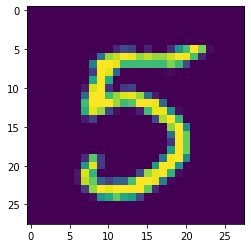

In [35]:
plt.imshow(X[0,:].reshape(28,28))

In [36]:
y_hot[0,:].argmax()

5

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.2, random_state=42)

In [38]:
model = Sequential()
model.add(Dense(400,input_shape = (784,),activation='sigmoid',name = 'l1'))
model.add(Dense(200,activation='sigmoid',name='l2'))
model.add(Dense(100,activation='sigmoid',name='l3'))
model.add(Dense(10,activation='softmax',name='l4'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 400)               314000    
_________________________________________________________________
l2 (Dense)                   (None, 200)               80200     
_________________________________________________________________
l3 (Dense)                   (None, 10)                2010      
_________________________________________________________________
l4 (Dense)                   (None, 10)                110       
Total params: 396,320
Trainable params: 396,320
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
outcome = model.fit(X_train,y_train,epochs=10)

Train on 15999 samples
Epoch 1/10
15999/15999 [==============================] - 3s 199us/sample - loss: 1.4331 - accuracy: 0.6602
Epoch 2/10
15999/15999 [==============================] - 2s 147us/sample - loss: 0.7891 - accuracy: 0.8631
Epoch 3/10
15999/15999 [==============================] - 2s 147us/sample - loss: 0.5563 - accuracy: 0.8841
Epoch 4/10
15999/15999 [==============================] - 2s 151us/sample - loss: 0.4452 - accuracy: 0.8964
Epoch 5/10
15999/15999 [==============================] - 2s 150us/sample - loss: 0.3904 - accuracy: 0.9019
Epoch 6/10
15999/15999 [==============================] - 2s 150us/sample - loss: 0.3569 - accuracy: 0.9069
Epoch 7/10
15999/15999 [==============================] - 2s 150us/sample - loss: 0.3406 - accuracy: 0.9078
Epoch 8/10
15999/15999 [==============================] - 2s 148us/sample - loss: 0.3210 - accuracy: 0.9097
Epoch 9/10
15999/15999 [==============================] - 2s 148us/sample - loss: 0.2972 - accuracy: 0.9159
Epoch

In [42]:
model.evaluate(X_test,y_test)

4000/4000 [==============================] - 0s 90us/sample - loss: 0.3280 - accuracy: 0.9007


[0.32801481997966764, 0.90075]

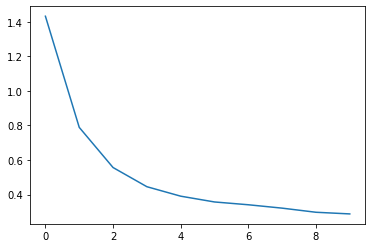

In [43]:
plt.plot(outcome.history['loss'])

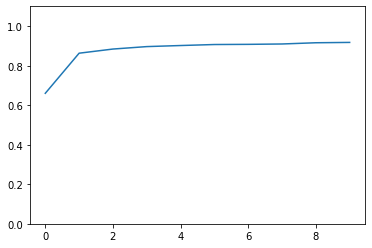

In [44]:
plt.figure()
plt.plot(outcome.history['accuracy'])
plt.ylim(0,1.1)
plt.show()